#imported Libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Date

In [153]:
date=pd.read_csv('/content/drive/MyDrive/ATLIQ HOSPITALITY/dim_date.csv')
date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [154]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [155]:
import datetime as dt

In [156]:
def convert_date(date):
  return dt.datetime.strptime(date,'%d-%b-%y')
date['date']=date['date'].apply(convert_date)

In [157]:
date.insert(loc=1, column="month", value=date['date'].dt.month_name())
date.insert(loc=2, column="year", value=date['date'].dt.year)
date.insert(loc=3, column="day", value=date['date'].dt.day_name())

In [158]:
date.drop('mmm yy',axis=1,inplace=True)

In [159]:
date.head()

,date,month,year,day,week no,day_type
0,2022-05-01,May,2022,Sunday,W 19,weekend
1,2022-05-02,May,2022,Monday,W 19,weekeday
2,2022-05-03,May,2022,Tuesday,W 19,weekeday
3,2022-05-04,May,2022,Wednesday,W 19,weekeday
4,2022-05-05,May,2022,Thursday,W 19,weekeday


In [160]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   month     92 non-null     object        
 2   year      92 non-null     int32         
 3   day       92 non-null     object        
 4   week no   92 non-null     object        
 5   day_type  92 non-null     object        
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 4.1+ KB


In [161]:
date['year'].unique()

array([2022], dtype=int32)

In [162]:
date['month'].unique()

array(['May', 'June', 'July'], dtype=object)

In [163]:
date['day_type']=date['day_type'].astype('category')

In [164]:
date.duplicated().sum()

0

✈ **Conclusion**
*   Data of date file is of may-2022 to july-2022



# hotels


In [165]:
hotels=pd.read_csv('/content/drive/MyDrive/ATLIQ HOSPITALITY/dim_hotels.csv')
hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [166]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [167]:
prop_name=list(hotels['property_name'].unique())
cate_name=list(hotels['category'].unique())
city_name=list(hotels['city'].unique())


In [168]:
print('property name :',prop_name)
print('category name :',cate_name)
print('city mane :',city_name)

property name : ['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu', 'Atliq Bay', 'Atliq Palace', 'Atliq Seasons']
category name : ['Luxury', 'Business']
city mane : ['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore']


In [169]:
hotels.groupby(['city','property_name'])

In [170]:
hotels['category']=hotels['category'].astype('category')
hotels['city']=hotels['city'].astype('category')

In [171]:
hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [172]:
hotels.duplicated().sum()

0

✈ **Conclusion**
*   **city name** : ['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore']
*  **property name** : ['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu', 'Atliq Bay', 'Atliq Palace', 'Atliq Seasons']
*   **category name** : ['Luxury', 'Business']



# room

In [173]:
room=pd.read_csv('/content/drive/MyDrive/ATLIQ HOSPITALITY/dim_rooms.csv')
room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [174]:
room['room_id']=room['room_id'].astype('category')
room['room_class']=room['room_class'].astype('category')

In [175]:
room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   room_id     4 non-null      category
 1   room_class  4 non-null      category
dtypes: category(2)
memory usage: 544.0 bytes


**✈ Conclusion**
*   4 types of room available

# prebooking

In [176]:
prebooking=pd.read_csv('/content/drive/MyDrive/ATLIQ HOSPITALITY/fact_aggregated_bookings.csv')
prebooking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


**prebooking**
           
*   **prebooking** : *property_id* : **hotels** : *property_id*
*   **prebooking** : *room_category* : **rooms** : *room_id*
*   **prebooking** : *check_in_date*	 : **Date** : *date*











In [177]:
prebooking['check_in_date']=prebooking['check_in_date'].apply(convert_date)


In [178]:
prebooking['room_category']=prebooking['room_category'].astype('category')

In [179]:
prebooking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   category      
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 296.8 KB


In [180]:
prebooking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30
1,19562,2022-05-01,RT1,28,30
2,19563,2022-05-01,RT1,23,30
3,17558,2022-05-01,RT1,13,19
4,16558,2022-05-01,RT1,18,19


In [181]:
prebooking.duplicated().sum()

0

# booking

In [182]:
booking=pd.read_csv('/content/drive/MyDrive/ATLIQ HOSPITALITY/fact_bookings.csv')
booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [183]:
booking['check_in_date']=pd.to_datetime(booking['check_in_date'],format='%Y-%m-%d')
booking['checkout_date']=pd.to_datetime(booking['checkout_date'],format='%Y-%m-%d')
booking['booking_date']=pd.to_datetime(booking['booking_date'],format='%Y-%m-%d')

In [184]:
booking['room_category']=booking['room_category'].astype('category')
booking['booking_platform']=booking['booking_platform'].astype('category')
booking['booking_status']=booking['booking_status'].astype('category')

In [185]:
booking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  category      
 7   booking_platform   134590 non-null  category      
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  category      
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: category(3), datetime64[ns](3), float64(1), int64(4), object(1)
memory usage: 9.6+ MB


In [186]:
booking.duplicated().sum()

0

In [187]:
booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [188]:
booking[['no_guests','ratings_given','revenue_generated','revenue_realized']].describe()

,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,56683.000000,134590.000000,134590.000000
mean,2.036808,3.619004,14916.013188,12696.123256
std,1.031766,1.235009,6452.868072,6928.108124
min,1.000000,1.000000,6500.000000,2600.000000
25%,1.000000,3.000000,9900.000000,7600.000000
50%,2.000000,4.000000,13500.000000,11700.000000
75%,2.000000,5.000000,18000.000000,15300.000000
max,6.000000,5.000000,45220.000000,45220.000000


In [189]:
booking['booking_status'].unique()

['Checked Out', 'Cancelled', 'No Show']
Categories (3, object): ['Cancelled', 'Checked Out', 'No Show']

avg rating

In [190]:
avg_rating=round(booking['ratings_given'].mean(),2)
avg_rating

3.62

total null

In [191]:
booking['ratings_given'].isnull().sum()

77907

cancelled null

In [192]:
booking[booking['booking_status']=='Cancelled']['booking_status'].count()

33420

In [193]:
#cancelled booking fill rating avg
booking.loc[booking['booking_status']=='Cancelled', 'ratings_given'] = booking.loc[booking['booking_status']=='Cancelled', 'ratings_given'].fillna(avg_rating)

In [194]:
booking[(booking['booking_status']=='Cancelled') & booking['ratings_given'].isnull()]['booking_status'].count()

0

remain null

In [195]:
booking['ratings_given'].isnull().sum()

44487

no show null

In [196]:
booking[(booking['booking_status']=='No Show') & (booking['ratings_given'].isnull())]['booking_status'].count()

6759

In [197]:
booking.loc[booking['booking_status']=='No Show', 'ratings_given'] = booking.loc[booking['booking_status']=='No Show', 'ratings_given'].fillna(0)

In [198]:
booking[(booking['booking_status']=='No Show') & booking['ratings_given'].isnull()]['booking_status'].count()

0

remain null

In [199]:
booking['ratings_given'].isnull().sum()

37728

checked out null

In [200]:
booking[(booking['booking_status']=='Checked Out') & (booking['ratings_given'].isnull())]['booking_status'].count()

37728

In [201]:
booking.loc[booking['booking_status']=='Checked Out', 'ratings_given'] = booking.loc[booking['booking_status']=='Checked Out', 'ratings_given'].fillna(avg_rating)

In [202]:
booking[(booking['booking_status']=='Checked Out') & booking['ratings_given'].isnull()]['booking_status'].count()

0

total null

In [203]:
booking['ratings_given'].isnull().sum()

0

In [204]:
booking[booking['booking_status'].isna()].count()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,0
booking_status,0


In [205]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  category      
 7   booking_platform   134590 non-null  category      
 8   ratings_given      134590 non-null  float64       
 9   booking_status     134590 non-null  category      
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: category(3), datetime64[ns](3), float64(1), int64(4), object(1)
memory usage: 9.6+ MB


▶ avg rating

In [206]:
booking['ratings_given'].agg(['count', 'mean'])

,ratings_given
count,134590.000000
mean,3.437787


# analysis


In [207]:
date.columns

Index(['date', 'month', 'year', 'day', 'week no', 'day_type'], dtype='object')

In [208]:
hotels.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

In [209]:
room.columns

Index(['room_id', 'room_class'], dtype='object')

In [210]:
prebooking.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

In [211]:
booking.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

##**Revenue Analysis**

### ⚡  **revenue_realized sum**





Total revenue generated vs revenue realized for all booking status

In [212]:
booking[['no_guests','revenue_generated','revenue_realized']].sum()

,0
no_guests,274134
revenue_generated,2007546215
revenue_realized,1708771229


Total revenue generated vs revenue realized when booking status is cancelled

In [213]:
booking[booking['booking_status']=='Cancelled'][['no_guests','revenue_generated','revenue_realized']].sum()

,0
no_guests,67949
revenue_generated,497958310
revenue_realized,199183324


Total revenue generated vs revenue realized when booking status is not cancelled i.e. No Show & checked out

In [214]:
booking[booking['booking_status']!='Cancelled'][['no_guests','revenue_generated','revenue_realized']].sum()

,0
no_guests,206185
revenue_generated,1509587905
revenue_realized,1509587905


Total bookings


In [215]:
booking['booking_id'].count()

134590

In [216]:
hotel_book = booking.merge(hotels, on='property_id', how='left')
hotel_book.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.00,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3.62,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.00,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3.62,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.00,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [217]:
hotel_book

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.00,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3.62,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.00,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3.62,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.00,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.00,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.00,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3.62,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.00,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [218]:
hotel_revenue=hotel_book.groupby(['city','property_name']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
hotel_revenue.reset_index(inplace=True)
hotel_revenue['Revenue in Millions']=(hotel_revenue['Revenue in Millions']/1000000).round(2)
hotel_revenue


<ipython-input-218-fe40576372f5>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,city,property_name,Revenue in Millions
0,Bangalore,Atliq Bay,82.44
1,Bangalore,Atliq Blu,72.96
2,Bangalore,Atliq City,81.88
3,Bangalore,Atliq Exotica,60.02
4,Bangalore,Atliq Grands,54.49
5,Bangalore,Atliq Palace,68.60
6,Bangalore,Atliq Seasons,0.00
7,Delhi,Atliq Bay,56.44
8,Delhi,Atliq Blu,57.93
9,Delhi,Atliq City,54.93


In [219]:
revenue_pivot=hotel_revenue.pivot(index='city',columns='property_name',values='Revenue in Millions')
revenue_pivot


property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
city,,,,,,,
Bangalore,82.44,72.96,81.88,60.02,54.49,68.60,0.00
Delhi,56.44,57.93,54.93,0.00,36.06,89.14,0.00
Hyderabad,69.26,56.04,61.01,47.84,46.25,44.84,0.00
Mumbai,51.91,73.92,88.00,212.44,74.73,101.51,66.13


In [220]:
fig = px.bar(hotel_revenue,
             x='city',
             y='Revenue in Millions',
             color='property_name',  # Color bars by hotel name
             title='City & Hotel Wise Revenue',
             barmode='group',       # Group bars by city
             labels={'Revenue in Millions':'Revenue in Millions'})
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

**Citywise Revenue In Millions**

In [221]:

city_revenue=hotel_book.groupby(['city']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
city_revenue['Revenue in Millions']=(city_revenue['Revenue in Millions']/1000000).round(2)
city_revenue.sort_values(by='Revenue in Millions',ascending=False)


<ipython-input-221-57098284e3cf>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Revenue in Millions
city,
Mumbai,668.64
Bangalore,420.40
Hyderabad,325.23
Delhi,294.50


In [222]:
fig = px.pie(city_revenue,
             values='Revenue in Millions',
             names=city_revenue.index,
             title='Citywise Revenue Distribution',
             labels={'value':'Revenue in Millions'})
fig.update_traces(textfont={'color':'white'})
fig.update_layout(legend_title_text='City')
fig.show()

In [223]:
revenue_tr=date.merge(hotel_book,how='left',left_on='date',right_on='check_in_date')
revenue_trend=revenue_tr.groupby(['week no','property_name']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
revenue_trend['Revenue in Millions']=(revenue_trend['Revenue in Millions']/1000000).round(2)
revenue_trend.reset_index(inplace=True)
revenue_trend

,week no,property_name,Revenue in Millions
0,W 19,Atliq Bay,20.87
1,W 19,Atliq Blu,20.98
2,W 19,Atliq City,23.32
3,W 19,Atliq Exotica,25.74
4,W 19,Atliq Grands,17.55
...,...,...,...
93,W 32,Atliq City,3.66
94,W 32,Atliq Exotica,3.85
95,W 32,Atliq Grands,2.63
96,W 32,Atliq Palace,3.79


In [224]:
pivot_data=revenue_trend.pivot(index='week no',columns='property_name',values='Revenue in Millions')
fig = px.line(pivot_data,
             x=pivot_data.index,
             y=pivot_data.columns,
             markers=True,
             title='Weekly Revenue Trend')
fig.update_layout(yaxis_title='Revenue in Millions', legend_title='Property Name')

fig.show()

In [225]:
# Week over Week Revenue Trend
atliq_revenue_trend=revenue_tr.groupby(['week no']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
atliq_revenue_trend['Revenue in Millions']=(atliq_revenue_trend['Revenue in Millions']/1000000).round(2)
atliq_revenue_trend['Prev week Revenue']=atliq_revenue_trend['Revenue in Millions'].shift(1)
atliq_revenue_trend['Change Percentage']=(((atliq_revenue_trend['Revenue in Millions']/atliq_revenue_trend['Prev week Revenue'])-1)*100).round(2)
atliq_revenue_trend

,Revenue in Millions,Prev week Revenue,Change Percentage
week no,,,
W 19,138.18,NaN,NaN
W 20,139.44,138.18,0.91
W 21,114.92,139.44,-17.58
W 22,138.72,114.92,20.71
W 23,115.57,138.72,-16.69
W 24,139.58,115.57,20.78
W 25,138.67,139.58,-0.65
W 26,114.15,138.67,-17.68
W 27,139.56,114.15,22.26


In [226]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=atliq_revenue_trend.index, y=atliq_revenue_trend['Revenue in Millions'], name='Revenue in Millions'),
    secondary_y=False,)
fig.add_trace(
    go.Bar(x=atliq_revenue_trend.index, y=atliq_revenue_trend['Prev week Revenue'], name='Prev week Revenue'),
    secondary_y=False,)
fig.add_trace(
    go.Scatter(x=atliq_revenue_trend.index, y=atliq_revenue_trend['Change Percentage'], name='Change Percentage', mode='lines+markers', marker=dict(color='black')),
    secondary_y=True,)
fig.update_layout(title_text='Week over Week Revenue Change',
                  xaxis_title='Week Number',
                  yaxis_title='Revenue in Millions',
                  yaxis2_title='Percentage Change')

fig.show()

## booking Analysis

In [227]:

# Hotelwise Bookings
hotel_bookings=hotel_book.groupby(['city','property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total bookings'})
hotel_bookings.reset_index(inplace=True)
hotel_bookings


<ipython-input-227-97e35ae11ff4>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,city,property_name,Total bookings
0,Bangalore,Atliq Bay,5812
1,Bangalore,Atliq Blu,5736
2,Bangalore,Atliq City,5979
3,Bangalore,Atliq Exotica,4705
4,Bangalore,Atliq Grands,4371
5,Bangalore,Atliq Palace,5413
6,Bangalore,Atliq Seasons,0
7,Delhi,Atliq Bay,4820
8,Delhi,Atliq Blu,4418
9,Delhi,Atliq City,4693


In [228]:
fig = px.bar(hotel_bookings,
             x='city',
             y='Total bookings',
             color='property_name',  # Color bars by hotel name
             title='City & Hotel Wise Revenue',
             barmode='group',       # Group bars by city
            )
fig.show()

In [229]:

# Hotelwise cancellation percentage, No Show Percentage, Check out percentage
df1=hotel_book.groupby(['property_name','booking_status']).agg({'booking_id':'nunique'}).reset_index().pivot(index='property_name',columns='booking_status',values='booking_id')
df2=hotel_book.groupby(['property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Toatal Bookings'})
df3=pd.merge(df1,df2,how='inner',on='property_name')
df3

<ipython-input-229-71f8303eae3c>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Cancelled,Checked Out,No Show,Toatal Bookings
property_name,,,,
Atliq Bay,5314,14965,1110,21389
Atliq Blu,5373,15267,1155,21795
Atliq City,5811,16365,1147,23323
Atliq Exotica,5713,16557,1171,23441
Atliq Grands,4273,11914,848,17035
Atliq Palace,5949,16532,1144,23625
Atliq Seasons,987,2811,184,3982


In [230]:

df3['Cancellation Percentage']=df3['Cancelled']*100/df3['Toatal Bookings']
df3['Checked Out Percentage']=df3['Checked Out']*100/df3['Toatal Bookings']
df3['No Show Percentage']=df3['No Show']*100/df3['Toatal Bookings']
df4=df3[['Checked Out Percentage','Cancellation Percentage','No Show Percentage']]
df4.round(2)

,Checked Out Percentage,Cancellation Percentage,No Show Percentage
property_name,,,
Atliq Bay,69.97,24.84,5.19
Atliq Blu,70.05,24.65,5.30
Atliq City,70.17,24.92,4.92
Atliq Exotica,70.63,24.37,5.00
Atliq Grands,69.94,25.08,4.98
Atliq Palace,69.98,25.18,4.84
Atliq Seasons,70.59,24.79,4.62


Text(0.5, 1.0, 'Hotel wise Check out, Cancellation, No Show Percentage')

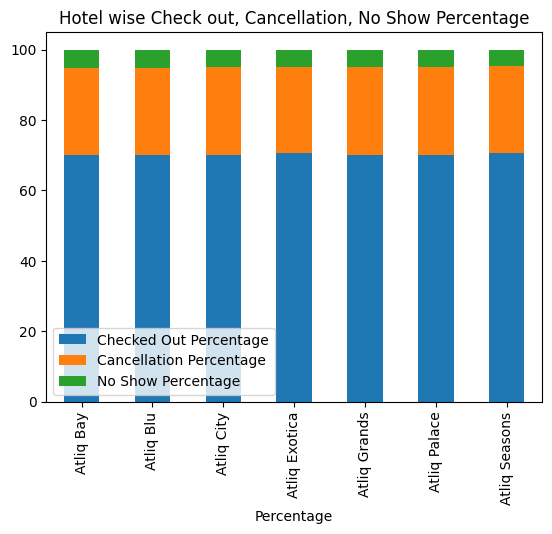

In [231]:

df4.plot(kind='bar',stacked=True)
plt.xlabel('Percentage')
plt.title('Hotel wise Check out, Cancellation, No Show Percentage')

In [232]:

# booking platform wise
platform_df=hotel_book.groupby(['booking_platform']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
platform_df.sort_values(by='Total Bookings',ascending=False)

<ipython-input-232-4a526748fd33>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Total Bookings
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


In [233]:
fig = px.pie(platform_df,
             values='Total Bookings',
             names=platform_df.index,
             title='Platformwise Hotel Bookings Distribution')
fig.show()

### ⚡succesful booking

In [234]:
succes_book=prebooking.merge(hotels,on='property_id',how='left')
succes_book


,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city
0,16559,2022-05-01,RT1,25,30,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28,30,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23,30,Atliq Palace,Business,Bangalore
3,17558,2022-05-01,RT1,13,19,Atliq Grands,Luxury,Mumbai
4,16558,2022-05-01,RT1,18,19,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18,Atliq Palace,Business,Delhi
9196,16559,2022-07-31,RT4,13,18,Atliq Exotica,Luxury,Mumbai
9197,17558,2022-07-31,RT4,3,6,Atliq Grands,Luxury,Mumbai
9198,19563,2022-07-31,RT4,3,6,Atliq Palace,Business,Bangalore


In [235]:
succes_book=succes_book[['city','property_id','property_name','category','successful_bookings','capacity']]
succes_book

,city,property_id,property_name,category,successful_bookings,capacity
0,Mumbai,16559,Atliq Exotica,Luxury,25,30
1,Bangalore,19562,Atliq Bay,Luxury,28,30
2,Bangalore,19563,Atliq Palace,Business,23,30
3,Mumbai,17558,Atliq Grands,Luxury,13,19
4,Delhi,16558,Atliq Grands,Luxury,18,19
...,...,...,...,...,...,...
9195,Delhi,16563,Atliq Palace,Business,13,18
9196,Mumbai,16559,Atliq Exotica,Luxury,13,18
9197,Mumbai,17558,Atliq Grands,Luxury,3,6
9198,Bangalore,19563,Atliq Palace,Business,3,6


In [236]:
booked = succes_book.groupby(['city','property_name','category'])[['successful_bookings','capacity']].sum()
booked = booked[booked != 0].dropna()
booked

<ipython-input-236-27e7ea59e095>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



successful_bookings  capacity
city      property_name category                               
Bangalore Atliq Bay     Luxury                 5812.0    8832.0
          Atliq Blu     Luxury                 5736.0   10764.0
          Atliq City    Business               5979.0    9108.0
          Atliq Exotica Luxury                 4705.0    8740.0
          Atliq Grands  Luxury                 4371.0    9844.0
          Atliq Palace  Business               5413.0   10120.0
Delhi     Atliq Bay     Luxury                 4820.0    9016.0
          Atliq Blu     Luxury                 4418.0    6716.0
          Atliq City    Business               4693.0    8740.0
          Atliq Grands  Luxury                 3153.0    4784.0
          Atliq Palace  Business               7147.0   10764.0
Hyderabad Atliq Bay     Luxury                 7333.0   11132.0
          Atliq Blu     Luxury                 6458.0    9844.0
          Atliq City    Business               6638.0   10028.0
          Atliq Exotica Luxury                 5256.0   11776.0
          Atliq Grands  Luxury                 4475.0    8372.0
          Atliq Palace  Business               4728.0    8924.0
Mumbai    Atliq Bay     Luxury                 3424.0    7636.0
          Atliq Blu     Luxury                 5183.0    7820.0
          Atliq City    Business               6013.0   11316.0
          Atliq Exotica Luxury                13480.0   20424.0
          Atliq Grands  Luxury                 5036.0    9384.0
          Atliq Palace  Business               6337.0    9568.0
          Atliq Seasons Business               3982.0    8924.0

In [237]:
booked_p = succes_book.groupby(['city','property_name'])[['successful_bookings','capacity']].sum()
booked_p = booked_p[booked_p != 0].dropna()
booked_p

<ipython-input-237-b290c0cbf819>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



successful_bookings  capacity
city      property_name                               
Bangalore Atliq Bay                   5812.0    8832.0
          Atliq Blu                   5736.0   10764.0
          Atliq City                  5979.0    9108.0
          Atliq Exotica               4705.0    8740.0
          Atliq Grands                4371.0    9844.0
          Atliq Palace                5413.0   10120.0
Delhi     Atliq Bay                   4820.0    9016.0
          Atliq Blu                   4418.0    6716.0
          Atliq City                  4693.0    8740.0
          Atliq Grands                3153.0    4784.0
          Atliq Palace                7147.0   10764.0
Hyderabad Atliq Bay                   7333.0   11132.0
          Atliq Blu                   6458.0    9844.0
          Atliq City                  6638.0   10028.0
          Atliq Exotica               5256.0   11776.0
          Atliq Grands                4475.0    8372.0
          Atliq Palace                4728.0    8924.0
Mumbai    Atliq Bay                   3424.0    7636.0
          Atliq Blu                   5183.0    7820.0
          Atliq City                  6013.0   11316.0
          Atliq Exotica              13480.0   20424.0
          Atliq Grands                5036.0    9384.0
          Atliq Palace                6337.0    9568.0
          Atliq Seasons               3982.0    8924.0

In [238]:
booked_c = succes_book.groupby('city')[['successful_bookings','capacity']].sum()
booked_c = booked_c[booked_c != 0].dropna()
booked_c

<ipython-input-238-efb5fc14012a>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,successful_bookings,capacity
city,,
Bangalore,32016,57408
Delhi,24231,40020
Hyderabad,34888,60076
Mumbai,43455,75072


In [239]:
fig = px.bar(booked_c,
             x=booked_c.index,
             y=['successful_bookings', 'capacity'],
             title='Total Successful Bookings and Capacity by City',
             barmode='group',
             labels={'value':'Count', 'variable':'Metric'}
            )
fig.show()

In [240]:
total_succes=booked_c[['successful_bookings','capacity']].sum()
total_succes = total_succes.rename(index={'successful_bookings': 'Total Successful Bookings', 'capacity': 'Total Capacity'})
total_succes

,0
Total Successful Bookings,134590
Total Capacity,232576


In [241]:
booked_prop = succes_book.groupby('property_name')[['successful_bookings','capacity']].sum()
booked_prop = booked_prop[booked_prop != 0].dropna()
booked_prop

,successful_bookings,capacity
property_name,,
Atliq Bay,21389,36616
Atliq Blu,21795,35144
Atliq City,23323,39192
Atliq Exotica,23441,40940
Atliq Grands,17035,32384
Atliq Palace,23625,39376
Atliq Seasons,3982,8924


### **⚡% succesful booking**

In [242]:
booked['% succesful booking']=round((booked['successful_bookings']/booked['capacity'])*100,2)
booked = booked.drop(['successful_bookings', 'capacity'], axis=1)
booked


% succesful booking
city      property_name category                     
Bangalore Atliq Bay     Luxury                  65.81
          Atliq Blu     Luxury                  53.29
          Atliq City    Business                65.65
          Atliq Exotica Luxury                  53.83
          Atliq Grands  Luxury                  44.40
          Atliq Palace  Business                53.49
Delhi     Atliq Bay     Luxury                  53.46
          Atliq Blu     Luxury                  65.78
          Atliq City    Business                53.70
          Atliq Grands  Luxury                  65.91
          Atliq Palace  Business                66.40
Hyderabad Atliq Bay     Luxury                  65.87
          Atliq Blu     Luxury                  65.60
          Atliq City    Business                66.19
          Atliq Exotica Luxury                  44.63
          Atliq Grands  Luxury                  53.45
          Atliq Palace  Business                52.98
Mumbai    Atliq Bay     Luxury                  44.84
          Atliq Blu     Luxury                  66.28
          Atliq City    Business                53.14
          Atliq Exotica Luxury                  66.00
          Atliq Grands  Luxury                  53.67
          Atliq Palace  Business                66.23
          Atliq Seasons Business                44.62

In [243]:
booked_p['% succesful booking']=round((booked_p['successful_bookings']/booked_p['capacity'])*100,2)
booked_p= booked_p.drop(['successful_bookings', 'capacity'], axis=1)
booked_p

% succesful booking
city      property_name                     
Bangalore Atliq Bay                    65.81
          Atliq Blu                    53.29
          Atliq City                   65.65
          Atliq Exotica                53.83
          Atliq Grands                 44.40
          Atliq Palace                 53.49
Delhi     Atliq Bay                    53.46
          Atliq Blu                    65.78
          Atliq City                   53.70
          Atliq Grands                 65.91
          Atliq Palace                 66.40
Hyderabad Atliq Bay                    65.87
          Atliq Blu                    65.60
          Atliq City                   66.19
          Atliq Exotica                44.63
          Atliq Grands                 53.45
          Atliq Palace                 52.98
Mumbai    Atliq Bay                    44.84
          Atliq Blu                    66.28
          Atliq City                   53.14
          Atliq Exotica                66.00
          Atliq Grands                 53.67
          Atliq Palace                 66.23
          Atliq Seasons                44.62

In [244]:
booked_c['% succesful booking']=round((booked_c['successful_bookings']/booked_c['capacity'])*100,2)
booked_c= booked_c.drop(['successful_bookings', 'capacity'], axis=1)
booked_c

,% succesful booking
city,
Bangalore,55.77
Delhi,60.55
Hyderabad,58.07
Mumbai,57.88


In [245]:
fig = px.pie(booked_c,
             values='% succesful booking',
             names=booked_c.index,
             title='Successful Booking Percentage by City')
fig.show()

In [246]:
total_succes_in_p=round((total_succes['Total Successful Bookings']/total_succes['Total Capacity'])*100,2)
total_succes_in_p

57.87

In [247]:

booked_prop['% succesful booking']=round((booked_prop['successful_bookings']/booked_prop['capacity'])*100,2)
booked_prop= booked_prop.drop(['successful_bookings', 'capacity'], axis=1)
booked_prop

,% succesful booking
property_name,
Atliq Bay,58.41
Atliq Blu,62.02
Atliq City,59.51
Atliq Exotica,57.26
Atliq Grands,52.60
Atliq Palace,60.00
Atliq Seasons,44.62


In [248]:
fig = px.pie(booked_prop,
             values='% succesful booking',
             names=booked_prop.index,
             title='Successful Booking Percentage by property')
fig.show()

In [249]:

rooms_df=room.merge(booking,how='left',left_on='room_id',right_on='room_category')
rooms_df.head()

,room_id,room_class,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,RT1,Standard,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.00,Checked Out,10010,10010
1,RT1,Standard,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3.62,Cancelled,9100,3640
2,RT1,Standard,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.00,Checked Out,9100,9100
3,RT1,Standard,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3.62,Cancelled,9100,3640
4,RT1,Standard,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.00,Checked Out,10920,10920


In [250]:
# Room Categorywise Bookings
room_bookings=rooms_df.groupby(['room_class']).agg({'booking_id':'nunique'})
room_bookings['Percentage']=room_bookings['booking_id']*100/room_bookings['booking_id'].sum()
room_bookings['Percentage']=room_bookings['Percentage'].round(2)
room_bookings


<ipython-input-250-7b8c28a8617f>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,booking_id,Percentage
room_class,,
Elite,49505,36.78
Premium,30566,22.71
Presidential,16073,11.94
Standard,38446,28.57


array([<Axes: ylabel='Percentage'>], dtype=object)

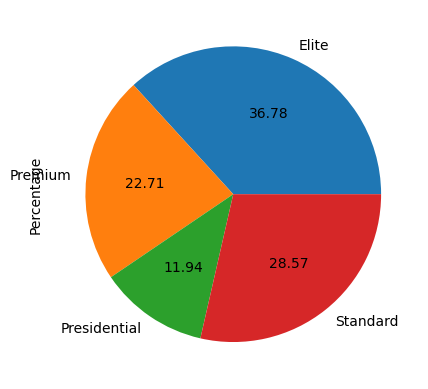

In [251]:
# Room Caegory wise Booking Percentage
room_bookings['Percentage'].plot(kind='pie',subplots=True,autopct='%0.2f')

In [252]:
# Booking Trends weekly
weekly_bookings=revenue_tr.groupby(['week no','property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
weekly_bookings.reset_index(inplace=True)
weekly_bookings_pivot=weekly_bookings.pivot(index='week no',columns='property_name',values='Total Bookings')
weekly_bookings_pivot


property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
week no,,,,,,,
W 19,1745,1771,1897,1907,1411,1913,321
W 20,1746,1789,1906,1906,1384,1908,319
W 21,1441,1465,1586,1546,1134,1600,270
W 22,1726,1754,1896,1913,1389,1933,323
W 23,1421,1475,1559,1624,1149,1591,270
W 24,1756,1784,1916,1937,1394,1929,325
W 25,1734,1779,1897,1895,1381,1930,327
W 26,1424,1459,1568,1574,1141,1581,270
W 27,1758,1777,1883,1911,1379,1933,321


Text(0.5, 1.0, 'Weekly Hotel Bookings')

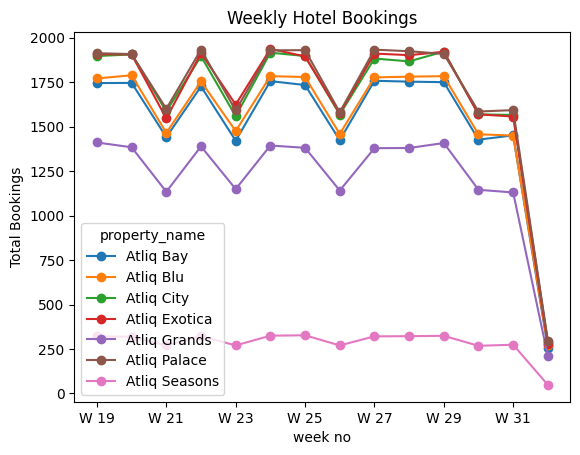

In [253]:

weekly_bookings_pivot.plot(kind='line',marker='o')
plt.ylabel('Total Bookings')
plt.title('Weekly Hotel Bookings')

In [254]:

x=revenue_tr.groupby(['week no','booking_status']).agg({'booking_id':'nunique'})
x.reset_index(inplace=True)
x


<ipython-input-254-43d68fdd87bf>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,week no,booking_status,booking_id
0,W 19,Cancelled,2779
1,W 19,Checked Out,7628
2,W 19,No Show,558
3,W 20,Cancelled,2711
4,W 20,Checked Out,7699
5,W 20,No Show,548
6,W 21,Cancelled,2226
7,W 21,Checked Out,6331
8,W 21,No Show,485
9,W 22,Cancelled,2772


In [255]:

y=revenue_tr.groupby(['week no']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
y.reset_index(inplace=True)
y

,week no,Total Bookings
0,W 19,10965
1,W 20,10958
2,W 21,9042
3,W 22,10934
4,W 23,9089
5,W 24,11041
6,W 25,10943
7,W 26,9017
8,W 27,10962
9,W 28,10929


In [256]:

x1=x.pivot(index='week no',columns='booking_status',values='booking_id')
hotel_booking=pd.merge(x1,y,on='week no')
hotel_booking['Cancellation Percentage']=hotel_booking['Cancelled']*100/hotel_booking['Total Bookings']
hotel_booking['Checked Out Percentage']=hotel_booking['Checked Out']*100/hotel_booking['Total Bookings']
hotel_booking['No Show Percentage']=hotel_booking['No Show']*100/hotel_booking['Total Bookings']
booking_status_trend=hotel_booking[['week no','Checked Out Percentage','Cancellation Percentage','No Show Percentage']]
booking_status_trend

,week no,Checked Out Percentage,Cancellation Percentage,No Show Percentage
0,W 19,69.566803,25.344277,5.088919
1,W 20,70.259171,24.739916,5.000913
2,W 21,70.017695,24.618447,5.363858
3,W 22,69.370770,25.352113,5.277117
4,W 23,70.403785,24.447134,5.149081
5,W 24,69.631374,25.332850,5.035776
6,W 25,69.971671,25.111944,4.916385
7,W 26,69.779306,25.496285,4.724409
8,W 27,70.552819,24.548440,4.898741
9,W 28,70.976302,24.183365,4.840333


Text(0.5, 1.0, 'Weekly Booking Status')

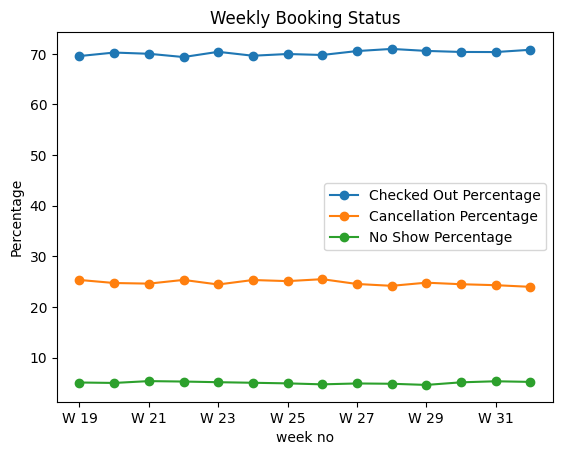

In [257]:

x1=booking_status_trend.set_index('week no')
x1.plot(kind='line',marker='o')
plt.ylabel('Percentage')
plt.title('Weekly Booking Status')

## **Occupancy Analysis**

### ⚡**sum of capacity**

In [258]:
capi=hotels.merge(prebooking,on='property_id',how='outer').merge(room,left_on='room_category',right_on='room_id',how='outer')

In [259]:
capi=capi[['city','property_id','property_name','category','room_class','room_id','successful_bookings','capacity']]

In [260]:
capi.head()

,city,property_id,property_name,category,room_class,room_id,successful_bookings,capacity
0,Delhi,16558,Atliq Grands,Luxury,Standard,RT1,18,19
1,Delhi,16558,Atliq Grands,Luxury,Standard,RT1,12,19
2,Delhi,16558,Atliq Grands,Luxury,Standard,RT1,14,19
3,Delhi,16558,Atliq Grands,Luxury,Standard,RT1,13,19
4,Delhi,16558,Atliq Grands,Luxury,Standard,RT1,12,19


In [261]:
max_cap=capi.groupby(['city','property_id','property_name','category','room_class'])['capacity'].agg('max').dropna()
max_cap.reset_index()

<ipython-input-261-fc529c952f4c>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,city,property_id,property_name,category,room_class,capacity
0,Bangalore,19558,Atliq Grands,Luxury,Elite,39.0
1,Bangalore,19558,Atliq Grands,Luxury,Premium,21.0
2,Bangalore,19558,Atliq Grands,Luxury,Presidential,7.0
3,Bangalore,19558,Atliq Grands,Luxury,Standard,40.0
4,Bangalore,19559,Atliq Exotica,Luxury,Elite,41.0
...,...,...,...,...,...,...
95,Mumbai,17563,Atliq Palace,Business,Standard,25.0
96,Mumbai,17564,Atliq Seasons,Business,Elite,40.0
97,Mumbai,17564,Atliq Seasons,Business,Premium,24.0
98,Mumbai,17564,Atliq Seasons,Business,Presidential,17.0


In [262]:
max_cap_per_room = capi.groupby(['city', 'property_name', 'room_class'])['capacity'].max().reset_index()
sum_max_cap = max_cap_per_room.groupby(['city', 'property_name'])['capacity'].sum()
sum_max_cap.reset_index()

<ipython-input-262-b0344b02d6d7>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-262-b0344b02d6d7>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,city,property_name,capacity
0,Bangalore,Atliq Bay,96.0
1,Bangalore,Atliq Blu,117.0
2,Bangalore,Atliq City,99.0
3,Bangalore,Atliq Exotica,95.0
4,Bangalore,Atliq Grands,107.0
5,Bangalore,Atliq Palace,110.0
6,Bangalore,Atliq Seasons,0.0
7,Delhi,Atliq Bay,98.0
8,Delhi,Atliq Blu,73.0
9,Delhi,Atliq City,95.0


In [263]:
sum_max_cap_city = max_cap_per_room.groupby('city')['capacity'].sum()
sum_max_cap_city = sum_max_cap_city.rename_axis('city').reset_index(name='Total Capacity')
sum_max_cap_city

<ipython-input-263-c94e49103b4c>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,city,Total Capacity
0,Bangalore,624.0
1,Delhi,435.0
2,Hyderabad,653.0
3,Mumbai,717.0


In [264]:
total_capacity=sum_max_cap_city['Total Capacity'].sum()
total_capacity

2429.0

In [265]:

oc=hotels.merge(prebooking,how='left',on='property_id')
occ_df=date.merge(oc,how='left',left_on='date',right_on='check_in_date')
occ_df.head()

,date,month,year,day,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity
0,2022-05-01,May,2022,Sunday,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT1,18,19
1,2022-05-01,May,2022,Sunday,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT2,21,22
2,2022-05-01,May,2022,Sunday,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT3,8,8
3,2022-05-01,May,2022,Sunday,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT4,3,3
4,2022-05-01,May,2022,Sunday,W 19,weekend,16559,Atliq Exotica,Luxury,Mumbai,2022-05-01,RT1,25,30


In [266]:
#Hotelwise Occupancy
hotel_occ=occ_df.groupby(['city','property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
hotel_occ=hotel_occ[hotel_occ != 0].dropna()
hotel_occ['Occupancy']=hotel_occ['successful_bookings']*100/hotel_occ['capacity']
hotel_occ.reset_index(inplace=True)

hotel_occ['Occupancy']=hotel_occ['Occupancy'].round(2)
hotel_occ

<ipython-input-266-5c8ef065173f>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,city,property_name,successful_bookings,capacity,Occupancy
0,Bangalore,Atliq Bay,5812.0,8832.0,65.81
1,Bangalore,Atliq Blu,5736.0,10764.0,53.29
2,Bangalore,Atliq City,5979.0,9108.0,65.65
3,Bangalore,Atliq Exotica,4705.0,8740.0,53.83
4,Bangalore,Atliq Grands,4371.0,9844.0,44.40
5,Bangalore,Atliq Palace,5413.0,10120.0,53.49
6,Delhi,Atliq Bay,4820.0,9016.0,53.46
7,Delhi,Atliq Blu,4418.0,6716.0,65.78
8,Delhi,Atliq City,4693.0,8740.0,53.70
9,Delhi,Atliq Grands,3153.0,4784.0,65.91


Text(0.5, 1.0, 'City & Hotel wise Occupancy')

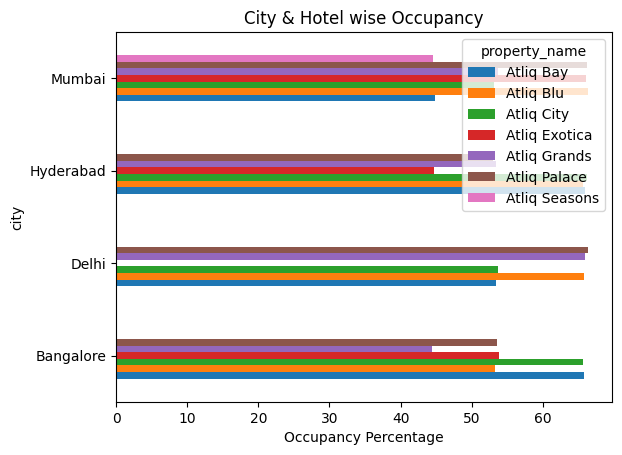

In [267]:

hotel_occ_pivot=hotel_occ.pivot(index='city',columns='property_name',values='Occupancy')
hotel_occ_pivot.plot(kind='barh')
plt.xlabel('Occupancy Percentage')
plt.title('City & Hotel wise Occupancy')

In [268]:
# Room Class wise Occupancy
room_occ=room.merge(occ_df,how='left',left_on='room_id',right_on='room_category')
room_occ_df=room_occ.groupby(['room_class']).agg({'successful_bookings':'sum','capacity':'sum'})
room_occ_df['Occupancy']=room_occ_df['successful_bookings']*100/room_occ_df['capacity']
room_occ_df['Occupancy']=room_occ_df['Occupancy'].round(2)
room_occ_df


<ipython-input-268-11594ec27029>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,successful_bookings,capacity,Occupancy
room_class,,,
Elite,49505,85928,57.61
Premium,30566,53084,57.58
Presidential,16073,27140,59.22
Standard,38446,66424,57.88


In [269]:
room_df=room_occ_df[['Occupancy']]
room_df=room_df.sort_values(by='Occupancy')
room_df

,Occupancy
room_class,
Premium,57.58
Elite,57.61
Standard,57.88
Presidential,59.22


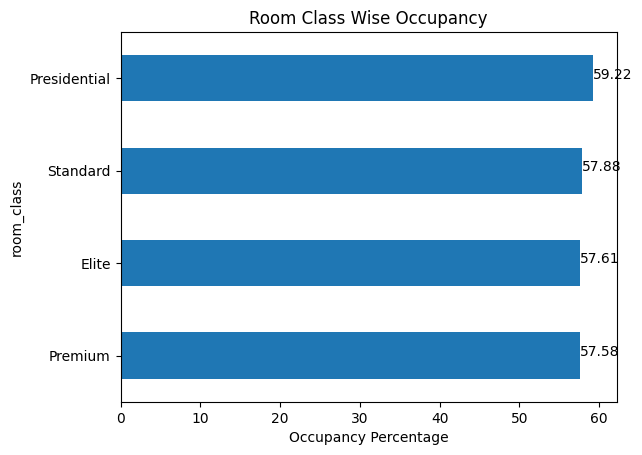

In [270]:
ax=room_df.plot(kind='barh',legend=False)
plt.xlabel('Occupancy Percentage')
plt.title('Room Class Wise Occupancy')
for index, value in enumerate(room_df['Occupancy']):
    ax.text(value, index, str(value))
plt.show()

In [271]:
occ_df.head()

,date,month,year,day,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity
0,2022-05-01,May,2022,Sunday,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT1,18,19
1,2022-05-01,May,2022,Sunday,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT2,21,22
2,2022-05-01,May,2022,Sunday,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT3,8,8
3,2022-05-01,May,2022,Sunday,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT4,3,3
4,2022-05-01,May,2022,Sunday,W 19,weekend,16559,Atliq Exotica,Luxury,Mumbai,2022-05-01,RT1,25,30


In [272]:
# Daywise Occupancy

occ_df['Day No']=occ_df['date'].dt.dayofweek
day_occ=occ_df.groupby(['day','Day No','property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
day_occ['Occupancy']=day_occ['successful_bookings']*100/day_occ['capacity']
day_occx=day_occ[['Occupancy']]
z=day_occx.reset_index()
z.sort_values(by='Day No')

,day,Day No,property_name,Occupancy
13,Monday,0,Atliq Seasons,38.620143
7,Monday,0,Atliq Bay,51.816776
8,Monday,0,Atliq Blu,55.618204
9,Monday,0,Atliq City,52.690502
10,Monday,0,Atliq Exotica,51.063094
11,Monday,0,Atliq Grands,46.590909
12,Monday,0,Atliq Palace,53.324946
35,Tuesday,1,Atliq Bay,52.010050
36,Tuesday,1,Atliq Blu,54.409988
37,Tuesday,1,Atliq City,52.130733


Text(0.5, 1.0, 'Daywise Occupancy')

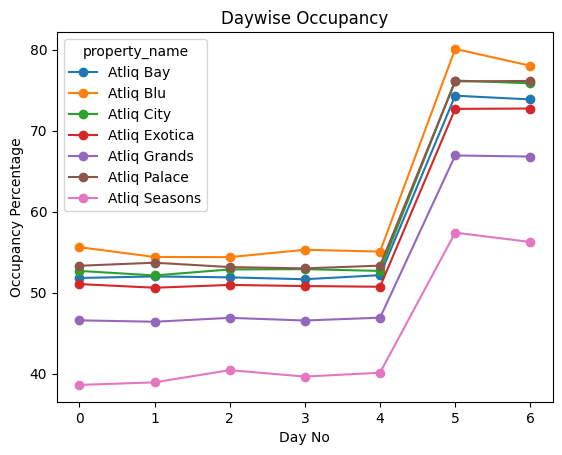

In [273]:
z_pivot=z.pivot(index='Day No',columns='property_name',values='Occupancy')
z_pivot.plot(kind='line',marker='o')
plt.ylabel('Occupancy Percentage')
plt.title('Daywise Occupancy')

In [274]:
weekly_occ=occ_df.groupby(['week no','property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
weekly_occx=weekly_occ.reset_index()
weekly_occx['Occupancy']=weekly_occx['successful_bookings']*100/weekly_occx['capacity']
weekly_occx

,week no,property_name,successful_bookings,capacity,Occupancy
0,W 19,Atliq Bay,1745,2786,62.634602
1,W 19,Atliq Blu,1771,2674,66.230366
2,W 19,Atliq City,1897,2982,63.615023
3,W 19,Atliq Exotica,1907,3115,61.219904
4,W 19,Atliq Grands,1411,2464,57.264610
...,...,...,...,...,...
93,W 32,Atliq City,291,426,68.309859
94,W 32,Atliq Exotica,279,445,62.696629
95,W 32,Atliq Grands,210,352,59.659091
96,W 32,Atliq Palace,296,428,69.158879


In [275]:
weekly_occx_pivot=weekly_occx.pivot(index='week no',columns='property_name',values='Occupancy')
fig = px.line(weekly_occx_pivot,
             x=weekly_occx_pivot.index,
             y=weekly_occx_pivot.columns,
             markers=True,
             title='Weekly Occupancy Trend')
fig.update_layout(yaxis_title='Occupancy Percentage', legend_title='Property Name')
fig.show()

### ⚡**Daily average rate Analysis**

In [276]:
adr=revenue_tr.groupby(['property_name']).agg({'booking_id':'nunique','revenue_realized':'sum'})


adr['ADR']=adr['revenue_realized']/adr['booking_id']
adr['ADR']=adr['ADR'].round(0)
adrx=adr[['ADR']]
adry=adrx.sort_values(by='ADR')
adrx

,ADR
property_name,
Atliq Bay,12158.0
Atliq Blu,11969.0
Atliq City,12255.0
Atliq Exotica,13665.0
Atliq Grands,12418.0
Atliq Palace,12871.0
Atliq Seasons,16606.0


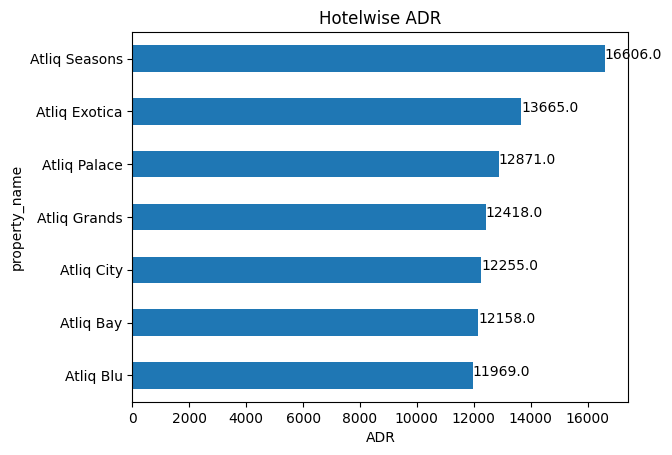

In [277]:
ax=adry.plot(kind='barh',legend=False)
plt.xlabel('ADR')
plt.title('Hotelwise ADR')
for index, value in enumerate(adry['ADR']):
    ax.text(value, index, str(value))
plt.show()

In [278]:
min_date=date['date'].min()
max_date=date['date'].max()
no_of_days=(max_date-min_date)/np.timedelta64(1,'D')
no_of_days

91.0

In [279]:
#DBRN
DBRN=adr[['booking_id']]/no_of_days
DBRN['booking_id']=DBRN['booking_id'].round(0)
DBRNx=DBRN.sort_values(by='booking_id')


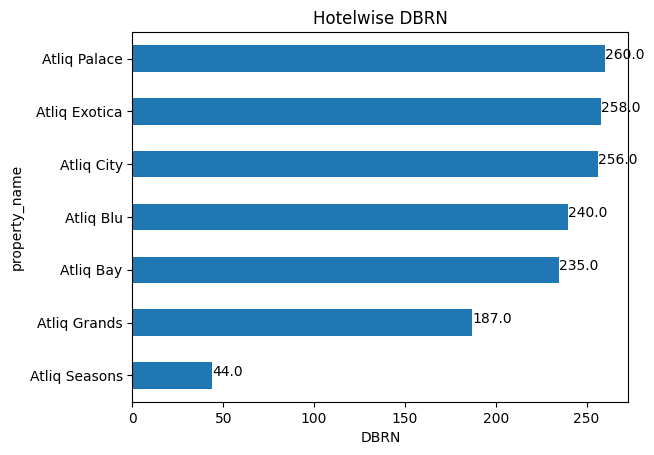

In [280]:
ax=DBRNx.plot(kind='barh',legend=False)
plt.xlabel('DBRN')
plt.title('Hotelwise DBRN')
for index, value in enumerate(DBRNx['booking_id']):
    ax.text(value, index, str(value))
plt.show()

In [281]:
#DSRN
hotel_capacity=pd.merge(hotels,prebooking,how='left',on='property_id').groupby(['property_name']).agg({'capacity':'sum'})
hotel_capacity['DSRN']=hotel_capacity/no_of_days
hotel_capacity['DSRN']=hotel_capacity['DSRN'].round(0)
hotel_capacity
hotel_capacityx=hotel_capacity.sort_values(by='DSRN')
hotel_capacityy=hotel_capacityx[['DSRN']]
hotel_capacityy

,DSRN
property_name,
Atliq Seasons,98.0
Atliq Grands,356.0
Atliq Blu,386.0
Atliq Bay,402.0
Atliq City,431.0
Atliq Palace,433.0
Atliq Exotica,450.0


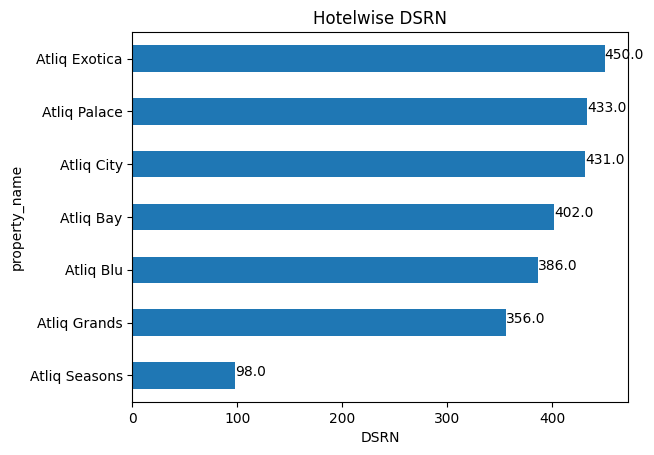

In [282]:

ax=hotel_capacityy.plot(kind='barh',legend=False)
plt.xlabel('DSRN')
plt.title('Hotelwise DSRN')
for index, value in enumerate(hotel_capacityy['DSRN']):
    ax.text(value, index, str(value))
plt.show()


In [283]:
# DURN
m=revenue_tr[revenue_tr['booking_status']=='Checked Out']
n=m.groupby(['property_name']).agg({'booking_id':'nunique'})
n['DURN']=n['booking_id']/no_of_days
n['DURN']=n['DURN'].round(0)
n1=n.sort_values(by='DURN')
n2=n1[['DURN']]
n2

,DURN
property_name,
Atliq Seasons,31.0
Atliq Grands,131.0
Atliq Bay,164.0
Atliq Blu,168.0
Atliq City,180.0
Atliq Exotica,182.0
Atliq Palace,182.0


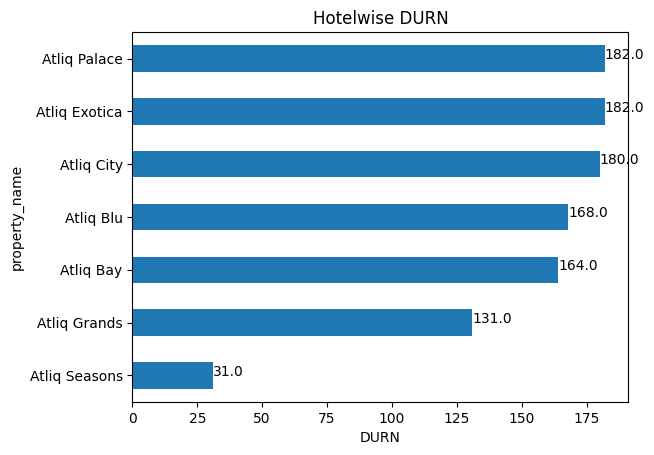

In [284]:

ax=n2.plot(kind='barh',legend=False)
plt.xlabel('DURN')
plt.title('Hotelwise DURN')
for index, value in enumerate(n2['DURN']):
    ax.text(value, index, str(value))
plt.show()


### ⚡**✈total cancellation**

In [285]:
can=booking.merge(hotels,on='property_id',how='left')
can

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.00,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,3.62,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.00,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,3.62,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.00,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.00,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.00,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,3.62,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.00,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [286]:
can=can[['city','property_name','category','booking_platform','booking_status']]
can

,city,property_name,category,booking_platform,booking_status
0,Delhi,Atliq Grands,Luxury,direct online,Checked Out
1,Delhi,Atliq Grands,Luxury,others,Cancelled
2,Delhi,Atliq Grands,Luxury,logtrip,Checked Out
3,Delhi,Atliq Grands,Luxury,others,Cancelled
4,Delhi,Atliq Grands,Luxury,direct online,Checked Out
...,...,...,...,...,...
134585,Mumbai,Atliq Seasons,Business,makeyourtrip,Checked Out
134586,Mumbai,Atliq Seasons,Business,logtrip,Checked Out
134587,Mumbai,Atliq Seasons,Business,tripster,Cancelled
134588,Mumbai,Atliq Seasons,Business,logtrip,Checked Out


In [287]:
can.dtypes

,0
city,category
property_name,object
category,category
booking_platform,category
booking_status,category


In [288]:
result1 = can.groupby(['city', 'property_name', 'category', 'booking_platform'])['booking_status'].value_counts().unstack()
result = result1[['Cancelled', 'No Show', 'Checked Out']]
result['Total'] = result['Cancelled'] + result['No Show'] + result['Checked Out']
result = result[result != 0].dropna()
result


<ipython-input-288-158d1601b801>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-288-158d1601b801>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



booking_status                                     Cancelled  No Show  \
city      property_name category booking_platform                       
Bangalore Atliq Bay     Luxury   direct offline         71.0     14.0   
                                 direct online         143.0     28.0   
                                 journey                81.0     19.0   
                                 logtrip               135.0     30.0   
                                 makeyourtrip          293.0     66.0   
...                                                      ...      ...   
Mumbai    Atliq Seasons Business journey                54.0     14.0   
                                 logtrip               123.0     19.0   
                                 makeyourtrip          200.0     45.0   
                                 others                383.0     59.0   
                                 tripster               67.0     17.0   

booking_status                                     Checked Out   Total  
city      property_name category booking_platform                       
Bangalore Atliq Bay     Luxury   direct offline          213.0   298.0  
                                 direct online           430.0   601.0  
                                 journey                 265.0   365.0  
                                 logtrip                 422.0   587.0  
                                 makeyourtrip            830.0  1189.0  
...                                                        ...     ...  
Mumbai    Atliq Seasons Business journey                 155.0   223.0  
                                 logtrip                 290.0   432.0  
                                 makeyourtrip            570.0   815.0  
                                 others                 1179.0  1621.0  
                                 tripster                205.0   289.0  

[168 rows x 4 columns]

In [289]:
# Select only 'Cancelled' and 'Total' columns
result_final = result[['Cancelled', 'Total']]
result_final

booking_status                                     Cancelled   Total
city      property_name category booking_platform                   
Bangalore Atliq Bay     Luxury   direct offline         71.0   298.0
                                 direct online         143.0   601.0
                                 journey                81.0   365.0
                                 logtrip               135.0   587.0
                                 makeyourtrip          293.0  1189.0
...                                                      ...     ...
Mumbai    Atliq Seasons Business journey                54.0   223.0
                                 logtrip               123.0   432.0
                                 makeyourtrip          200.0   815.0
                                 others                383.0  1621.0
                                 tripster               67.0   289.0

[168 rows x 2 columns]

In [290]:
result['rate of cancellation in %']=round((result_final['Cancelled']/result_final['Total'])*100,2)

result['rate of cancellation in %']


city       property_name  category  booking_platform
Bangalore  Atliq Bay      Luxury    direct offline      23.83
                                    direct online       23.79
                                    journey             22.19
                                    logtrip             23.00
                                    makeyourtrip        24.64
                                                        ...  
Mumbai     Atliq Seasons  Business  journey             24.22
                                    logtrip             28.47
                                    makeyourtrip        24.54
                                    others              23.63
                                    tripster            23.18
Name: rate of cancellation in %, Length: 168, dtype: float64

In [291]:
result2 = can.groupby(['city', 'property_name', 'category'])['booking_status'].value_counts().unstack()
result = result2[['Cancelled', 'No Show', 'Checked Out']]
result['Total'] = result['Cancelled'] + result['No Show'] + result['Checked Out']
result=result[result != 0].dropna()

result

<ipython-input-291-b66f8bb30d67>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-291-b66f8bb30d67>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



booking_status                    Cancelled  No Show  Checked Out    Total
city      property_name category                                          
Bangalore Atliq Bay     Luxury       1414.0    303.0       4095.0   5812.0
          Atliq Blu     Luxury       1414.0    319.0       4003.0   5736.0
          Atliq City    Business     1577.0    269.0       4133.0   5979.0
          Atliq Exotica Luxury       1152.0    220.0       3333.0   4705.0
          Atliq Grands  Luxury       1073.0    237.0       3061.0   4371.0
          Atliq Palace  Business     1372.0    281.0       3760.0   5413.0
Delhi     Atliq Bay     Luxury       1218.0    262.0       3340.0   4820.0
          Atliq Blu     Luxury       1127.0    204.0       3087.0   4418.0
          Atliq City    Business     1132.0    223.0       3338.0   4693.0
          Atliq Grands  Luxury        790.0    155.0       2208.0   3153.0
          Atliq Palace  Business     1805.0    340.0       5002.0   7147.0
Hyderabad Atliq Bay     Luxury       1811.0    376.0       5146.0   7333.0
          Atliq Blu     Luxury       1561.0    347.0       4550.0   6458.0
          Atliq City    Business     1595.0    331.0       4712.0   6638.0
          Atliq Exotica Luxury       1280.0    265.0       3711.0   5256.0
          Atliq Grands  Luxury       1118.0    233.0       3124.0   4475.0
          Atliq Palace  Business     1227.0    209.0       3292.0   4728.0
Mumbai    Atliq Bay     Luxury        871.0    169.0       2384.0   3424.0
          Atliq Blu     Luxury       1271.0    285.0       3627.0   5183.0
          Atliq City    Business     1507.0    324.0       4182.0   6013.0
          Atliq Exotica Luxury       3281.0    686.0       9513.0  13480.0
          Atliq Grands  Luxury       1292.0    223.0       3521.0   5036.0
          Atliq Palace  Business     1545.0    314.0       4478.0   6337.0
          Atliq Seasons Business      987.0    184.0       2811.0   3982.0

In [292]:
# Select only 'Cancelled' and 'Total' columns
result_final = result[['Cancelled', 'Total']]
result_final

booking_status                    Cancelled    Total
city      property_name category                    
Bangalore Atliq Bay     Luxury       1414.0   5812.0
          Atliq Blu     Luxury       1414.0   5736.0
          Atliq City    Business     1577.0   5979.0
          Atliq Exotica Luxury       1152.0   4705.0
          Atliq Grands  Luxury       1073.0   4371.0
          Atliq Palace  Business     1372.0   5413.0
Delhi     Atliq Bay     Luxury       1218.0   4820.0
          Atliq Blu     Luxury       1127.0   4418.0
          Atliq City    Business     1132.0   4693.0
          Atliq Grands  Luxury        790.0   3153.0
          Atliq Palace  Business     1805.0   7147.0
Hyderabad Atliq Bay     Luxury       1811.0   7333.0
          Atliq Blu     Luxury       1561.0   6458.0
          Atliq City    Business     1595.0   6638.0
          Atliq Exotica Luxury       1280.0   5256.0
          Atliq Grands  Luxury       1118.0   4475.0
          Atliq Palace  Business     1227.0   4728.0
Mumbai    Atliq Bay     Luxury        871.0   3424.0
          Atliq Blu     Luxury       1271.0   5183.0
          Atliq City    Business     1507.0   6013.0
          Atliq Exotica Luxury       3281.0  13480.0
          Atliq Grands  Luxury       1292.0   5036.0
          Atliq Palace  Business     1545.0   6337.0
          Atliq Seasons Business      987.0   3982.0

In [293]:
result['rate of cancellation in %']=round((result_final['Cancelled']/result_final['Total'])*100,2)

result['rate of cancellation in %']


city       property_name  category
Bangalore  Atliq Bay      Luxury      24.33
           Atliq Blu      Luxury      24.65
           Atliq City     Business    26.38
           Atliq Exotica  Luxury      24.48
           Atliq Grands   Luxury      24.55
           Atliq Palace   Business    25.35
Delhi      Atliq Bay      Luxury      25.27
           Atliq Blu      Luxury      25.51
           Atliq City     Business    24.12
           Atliq Grands   Luxury      25.06
           Atliq Palace   Business    25.26
Hyderabad  Atliq Bay      Luxury      24.70
           Atliq Blu      Luxury      24.17
           Atliq City     Business    24.03
           Atliq Exotica  Luxury      24.35
           Atliq Grands   Luxury      24.98
           Atliq Palace   Business    25.95
Mumbai     Atliq Bay      Luxury      25.44
           Atliq Blu      Luxury      24.52
           Atliq City     Business    25.06
           Atliq Exotica  Luxury      24.34
           Atliq Grands   Luxury      25.66
           Atliq Palace   Business    24.38
           Atliq Seasons  Business    24.79
Name: rate of cancellation in %, dtype: float64

In [294]:
result3 = can.groupby(['city', 'property_name'])['booking_status'].value_counts().unstack()
result = result3[['Cancelled', 'No Show', 'Checked Out']]
result['Total'] = result['Cancelled'] + result['No Show'] + result['Checked Out']
result=result[result != 0].dropna()
result

<ipython-input-294-ad77361d2a27>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-294-ad77361d2a27>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



booking_status           Cancelled  No Show  Checked Out    Total
city      property_name                                          
Bangalore Atliq Bay         1414.0    303.0       4095.0   5812.0
          Atliq Blu         1414.0    319.0       4003.0   5736.0
          Atliq City        1577.0    269.0       4133.0   5979.0
          Atliq Exotica     1152.0    220.0       3333.0   4705.0
          Atliq Grands      1073.0    237.0       3061.0   4371.0
          Atliq Palace      1372.0    281.0       3760.0   5413.0
Delhi     Atliq Bay         1218.0    262.0       3340.0   4820.0
          Atliq Blu         1127.0    204.0       3087.0   4418.0
          Atliq City        1132.0    223.0       3338.0   4693.0
          Atliq Grands       790.0    155.0       2208.0   3153.0
          Atliq Palace      1805.0    340.0       5002.0   7147.0
Hyderabad Atliq Bay         1811.0    376.0       5146.0   7333.0
          Atliq Blu         1561.0    347.0       4550.0   6458.0
          Atliq City        1595.0    331.0       4712.0   6638.0
          Atliq Exotica     1280.0    265.0       3711.0   5256.0
          Atliq Grands      1118.0    233.0       3124.0   4475.0
          Atliq Palace      1227.0    209.0       3292.0   4728.0
Mumbai    Atliq Bay          871.0    169.0       2384.0   3424.0
          Atliq Blu         1271.0    285.0       3627.0   5183.0
          Atliq City        1507.0    324.0       4182.0   6013.0
          Atliq Exotica     3281.0    686.0       9513.0  13480.0
          Atliq Grands      1292.0    223.0       3521.0   5036.0
          Atliq Palace      1545.0    314.0       4478.0   6337.0
          Atliq Seasons      987.0    184.0       2811.0   3982.0

In [295]:
# Select only 'Cancelled' and 'Total' columns
result_final = result[['Cancelled', 'Total']]
result_final

booking_status           Cancelled    Total
city      property_name                    
Bangalore Atliq Bay         1414.0   5812.0
          Atliq Blu         1414.0   5736.0
          Atliq City        1577.0   5979.0
          Atliq Exotica     1152.0   4705.0
          Atliq Grands      1073.0   4371.0
          Atliq Palace      1372.0   5413.0
Delhi     Atliq Bay         1218.0   4820.0
          Atliq Blu         1127.0   4418.0
          Atliq City        1132.0   4693.0
          Atliq Grands       790.0   3153.0
          Atliq Palace      1805.0   7147.0
Hyderabad Atliq Bay         1811.0   7333.0
          Atliq Blu         1561.0   6458.0
          Atliq City        1595.0   6638.0
          Atliq Exotica     1280.0   5256.0
          Atliq Grands      1118.0   4475.0
          Atliq Palace      1227.0   4728.0
Mumbai    Atliq Bay          871.0   3424.0
          Atliq Blu         1271.0   5183.0
          Atliq City        1507.0   6013.0
          Atliq Exotica     3281.0  13480.0
          Atliq Grands      1292.0   5036.0
          Atliq Palace      1545.0   6337.0
          Atliq Seasons      987.0   3982.0

In [296]:
result['rate of cancellation in %']=round((result_final['Cancelled']/result_final['Total'])*100,2)

result['rate of cancellation in %']


city       property_name
Bangalore  Atliq Bay        24.33
           Atliq Blu        24.65
           Atliq City       26.38
           Atliq Exotica    24.48
           Atliq Grands     24.55
           Atliq Palace     25.35
Delhi      Atliq Bay        25.27
           Atliq Blu        25.51
           Atliq City       24.12
           Atliq Grands     25.06
           Atliq Palace     25.26
Hyderabad  Atliq Bay        24.70
           Atliq Blu        24.17
           Atliq City       24.03
           Atliq Exotica    24.35
           Atliq Grands     24.98
           Atliq Palace     25.95
Mumbai     Atliq Bay        25.44
           Atliq Blu        24.52
           Atliq City       25.06
           Atliq Exotica    24.34
           Atliq Grands     25.66
           Atliq Palace     24.38
           Atliq Seasons    24.79
Name: rate of cancellation in %, dtype: float64

In [297]:
result4 = can.groupby(['city', 'property_name'])['booking_status'].value_counts().unstack()
result = result4[['Cancelled', 'No Show', 'Checked Out']]
result=result[result != 0].dropna()
result['Total'] = result['Cancelled'] + result['No Show'] + result['Checked Out']
result

<ipython-input-297-f5270e1293e4>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



booking_status           Cancelled  No Show  Checked Out    Total
city      property_name                                          
Bangalore Atliq Bay         1414.0    303.0       4095.0   5812.0
          Atliq Blu         1414.0    319.0       4003.0   5736.0
          Atliq City        1577.0    269.0       4133.0   5979.0
          Atliq Exotica     1152.0    220.0       3333.0   4705.0
          Atliq Grands      1073.0    237.0       3061.0   4371.0
          Atliq Palace      1372.0    281.0       3760.0   5413.0
Delhi     Atliq Bay         1218.0    262.0       3340.0   4820.0
          Atliq Blu         1127.0    204.0       3087.0   4418.0
          Atliq City        1132.0    223.0       3338.0   4693.0
          Atliq Grands       790.0    155.0       2208.0   3153.0
          Atliq Palace      1805.0    340.0       5002.0   7147.0
Hyderabad Atliq Bay         1811.0    376.0       5146.0   7333.0
          Atliq Blu         1561.0    347.0       4550.0   6458.0
          Atliq City        1595.0    331.0       4712.0   6638.0
          Atliq Exotica     1280.0    265.0       3711.0   5256.0
          Atliq Grands      1118.0    233.0       3124.0   4475.0
          Atliq Palace      1227.0    209.0       3292.0   4728.0
Mumbai    Atliq Bay          871.0    169.0       2384.0   3424.0
          Atliq Blu         1271.0    285.0       3627.0   5183.0
          Atliq City        1507.0    324.0       4182.0   6013.0
          Atliq Exotica     3281.0    686.0       9513.0  13480.0
          Atliq Grands      1292.0    223.0       3521.0   5036.0
          Atliq Palace      1545.0    314.0       4478.0   6337.0
          Atliq Seasons      987.0    184.0       2811.0   3982.0

In [298]:
# Select only 'Cancelled' and 'Total' columns
result_final = result[['Cancelled', 'Total']]
result_final

booking_status           Cancelled    Total
city      property_name                    
Bangalore Atliq Bay         1414.0   5812.0
          Atliq Blu         1414.0   5736.0
          Atliq City        1577.0   5979.0
          Atliq Exotica     1152.0   4705.0
          Atliq Grands      1073.0   4371.0
          Atliq Palace      1372.0   5413.0
Delhi     Atliq Bay         1218.0   4820.0
          Atliq Blu         1127.0   4418.0
          Atliq City        1132.0   4693.0
          Atliq Grands       790.0   3153.0
          Atliq Palace      1805.0   7147.0
Hyderabad Atliq Bay         1811.0   7333.0
          Atliq Blu         1561.0   6458.0
          Atliq City        1595.0   6638.0
          Atliq Exotica     1280.0   5256.0
          Atliq Grands      1118.0   4475.0
          Atliq Palace      1227.0   4728.0
Mumbai    Atliq Bay          871.0   3424.0
          Atliq Blu         1271.0   5183.0
          Atliq City        1507.0   6013.0
          Atliq Exotica     3281.0  13480.0
          Atliq Grands      1292.0   5036.0
          Atliq Palace      1545.0   6337.0
          Atliq Seasons      987.0   3982.0

In [299]:
result['rate of cancellation in %']=round((result_final['Cancelled']/result_final['Total'])*100,2)

result['rate of cancellation in %']


city       property_name
Bangalore  Atliq Bay        24.33
           Atliq Blu        24.65
           Atliq City       26.38
           Atliq Exotica    24.48
           Atliq Grands     24.55
           Atliq Palace     25.35
Delhi      Atliq Bay        25.27
           Atliq Blu        25.51
           Atliq City       24.12
           Atliq Grands     25.06
           Atliq Palace     25.26
Hyderabad  Atliq Bay        24.70
           Atliq Blu        24.17
           Atliq City       24.03
           Atliq Exotica    24.35
           Atliq Grands     24.98
           Atliq Palace     25.95
Mumbai     Atliq Bay        25.44
           Atliq Blu        24.52
           Atliq City       25.06
           Atliq Exotica    24.34
           Atliq Grands     25.66
           Atliq Palace     24.38
           Atliq Seasons    24.79
Name: rate of cancellation in %, dtype: float64

In [300]:
result5 = can.groupby('city')['booking_status'].value_counts().unstack()
result = result5[['Cancelled', 'No Show', 'Checked Out']]
result=result[result != 0].dropna()
result['Total'] = result['Cancelled'] + result['No Show'] + result['Checked Out']
result

<ipython-input-300-0fe3611cc9d6>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



booking_status,Cancelled,No Show,Checked Out,Total
city,,,,
Bangalore,8002,1629,22385,32016
Delhi,6072,1184,16975,24231
Hyderabad,8592,1761,24535,34888
Mumbai,10754,2185,30516,43455


In [301]:
# Select only 'Cancelled' and 'Total' columns
result_final = result[['Cancelled', 'Total']]
result_final

booking_status,Cancelled,Total
city,,
Bangalore,8002,32016
Delhi,6072,24231
Hyderabad,8592,34888
Mumbai,10754,43455


In [302]:
result['rate of cancellation in %']=round((result_final['Cancelled']/result_final['Total'])*100,2)

result['rate of cancellation in %']


,rate of cancellation in %
city,
Bangalore,24.99
Delhi,25.06
Hyderabad,24.63
Mumbai,24.75
